### Figure 8
Temparature and salinity profiles collected from AXCTD probes deployed in Ilulissat Icefjord, as part of the OMG mission (OMG, 2019). 

In [1]:
# IMPORT REQUIRED MODULES
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Define the OMG AXCTD directory
AXCTD_folder_path = 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ilulissat_icefjord_AXCTD'

# Get a list of CSV files in the folder and sort them based on the date in the filename
csv_files = [file_name for file_name in os.listdir(AXCTD_folder_path) if file_name.endswith('.csv')]
csv_files.sort(key=lambda x: x.split('_')[4])  

# Define the colours for each AXCTD profile 
colors = ['black', '#7209b7', '#d62246', '#ffa30f']

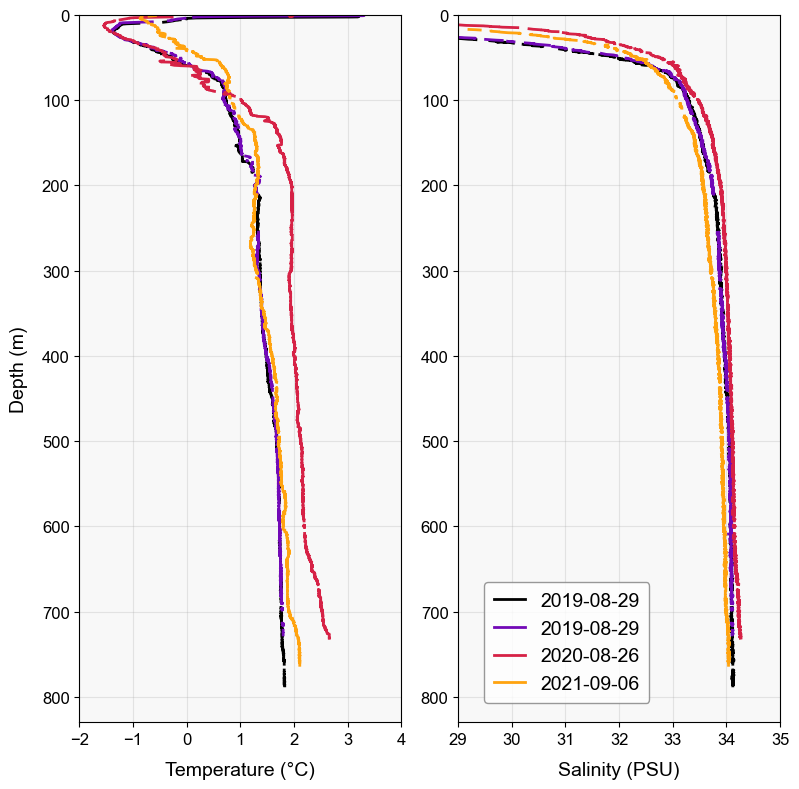

In [ ]:
# Plot temperature and salinity profiles for each AXCTD profile
plt.rcParams["font.family"] = "Arial"
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

for file_name, color in zip(csv_files, colors):
    if file_name.endswith('.csv'):
        date_str = file_name.split('_')[4]
        year = date_str[:4]
        month = date_str[4:6]
        day = date_str[6:8]
        formatted_date = f"{year}-{month}-{day}"
        df = pd.read_csv(os.path.join(AXCTD_folder_path, file_name))
        axs[0].plot(df['temperature'], df['depth'], label=formatted_date, linewidth=2, color=color) # Plot temperature against depth

axs[0].set_xlabel('Temperature (°C)', labelpad=10, fontsize=14)
axs[0].set_ylabel('Depth (m)', labelpad=10, fontsize=14)
axs[0].grid(axis='x', alpha=0.3, zorder=0)
axs[0].grid(axis='y', alpha=0.3, zorder=0)
axs[0].invert_yaxis()
axs[0].set_ylim(800+30, 0)
axs[0].set_xlim(-2, 4)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].tick_params(axis='x', labelsize=12)

# Plot salinity vs. depth for each dataset
for file_name, color in zip(csv_files, colors):
    if file_name.endswith('.csv'):
        date_str = file_name.split('_')[4]
        year = date_str[:4]
        month = date_str[4:6]
        day = date_str[6:8]
        formatted_date = f"{year}-{month}-{day}"
        df = pd.read_csv(os.path.join(AXCTD_folder_path, file_name))
        axs[1].plot(df['salinity'], df['depth'], label=formatted_date, linewidth=2, color=color) # Plot salinity against depth

axs[1].set_xlabel('Salinity (PSU)', labelpad=10, fontsize=14)
axs[1].grid(axis='x', alpha=0.3, zorder=0)
axs[1].grid(axis='y', alpha=0.3, zorder=0)
axs[1].invert_yaxis()
axs[1].set_ylim(800+30, 0)
axs[1].set_xlim(29, 35)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)

legend = axs[1].legend(loc='lower left', bbox_to_anchor=(0.02, 0), fontsize=14, facecolor='white', borderaxespad=1.0, borderpad=0.5, handlelength=1.6)
legend.legendPatch.set_edgecolor("gray")

plt.tight_layout()

# Define the light gray color for the plot background
light_gray = '#f8f8f8'
axs[0].set_facecolor(light_gray)
axs[1].set_facecolor(light_gray)

# Show the plots
#plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_8.png', dpi=300)
plt.show()